# Diabetese prediction 
This file contains project : Diabetese Prediction using Machine Learning
In this project we are using Pima Indians Diabetes Database (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

## Problem Statement 
Diabetese is a group of Metabolic disorders characterized by a high blood sugar level (hyperglycemia) over a prolonged period of time.
It is also known to be part of life style diseases wehich means that our life style may also be a factor of this disease to occur. There is no test which can surely say a person is diabetic or not. we have to consult a doctor which is now days a not possible due to our lifestyle. hence by building this system we try to decrease the preassure on the patient itself. They can put there data in our system we will predict wheather they have diabetese or not. We are not saying our system is replacement of doctors in any way it just provide doctors with a better under standing of the problem.

## About DataSet
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. 
##### Columns of dataset
 The Dataset contains 9 Columns namely:
 - Pregnancies
 - Glucose
 - BloodPressure
 - SkinThickness
 - Insulin
 - BMI
 - DiabetesPedigreeFunction
 - Age
 - Outcome


## Importing libraries and Depenceces

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

## Data Collection


In [3]:
#loading the Diabeatese dataset to Pandas DataFrame
diabetese_dataset = pd.read_csv('diabetes.csv')

In [4]:
#checking the data is loaded or not
diabetese_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetese_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
diabetese_dataset.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
449,0,120,74,18,63,30.5,0.285,26,0
651,1,117,60,23,106,33.8,0.466,27,0
82,7,83,78,26,71,29.3,0.767,36,0
415,3,173,84,33,474,35.7,0.258,22,1
302,5,77,82,41,42,35.8,0.156,35,0


In [7]:
diabetese_dataset.shape

(768, 9)

from the above we can see we have 9 columns and 768 rows that means 768 records

In [8]:
diabetese_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Analysis

First we have to see what is the type of the data stored in the columns 

In [9]:
#info of all the columns
diabetese_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
list(diabetese_dataset.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

From the above output we can say we have 1 target column that is outcome and all other 8 columns can be used to find the outcome

### Missing Values

Finding if there is any missing value in the dataset

In [11]:
diabetese_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As we can see that there is no missing values in the dataset we are ready to move forward

Seeing the distribution for diabetic and non diabetic people in dataset

<AxesSubplot: title={'center': 'Quality'}, ylabel='Outcome'>

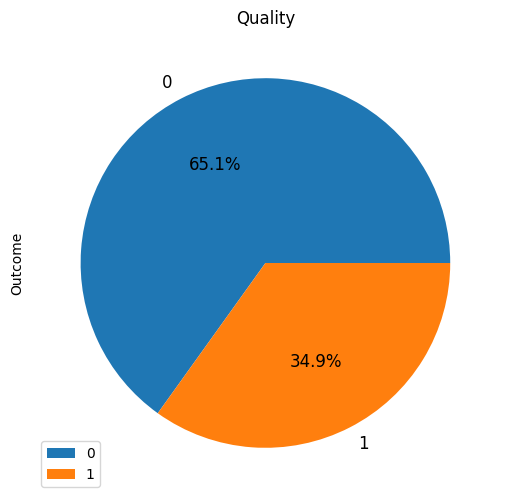

In [12]:
diabetese_dataset['Outcome'].value_counts().plot.pie(figsize=(6,6),title="Quality",autopct='%1.1f%%',fontsize=12,legend=True)
# plt.show()

Here 
- 0 means Non diabetic 
- 1 means diabetic
Ratio of diabetic and non diabetic is seems quite right 


### Distribution of Data

array([[<AxesSubplot: title={'center': 'Pregnancies'}>,
        <AxesSubplot: title={'center': 'Glucose'}>,
        <AxesSubplot: title={'center': 'BloodPressure'}>],
       [<AxesSubplot: title={'center': 'SkinThickness'}>,
        <AxesSubplot: title={'center': 'Insulin'}>,
        <AxesSubplot: title={'center': 'BMI'}>],
       [<AxesSubplot: title={'center': 'DiabetesPedigreeFunction'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Outcome'}>]], dtype=object)

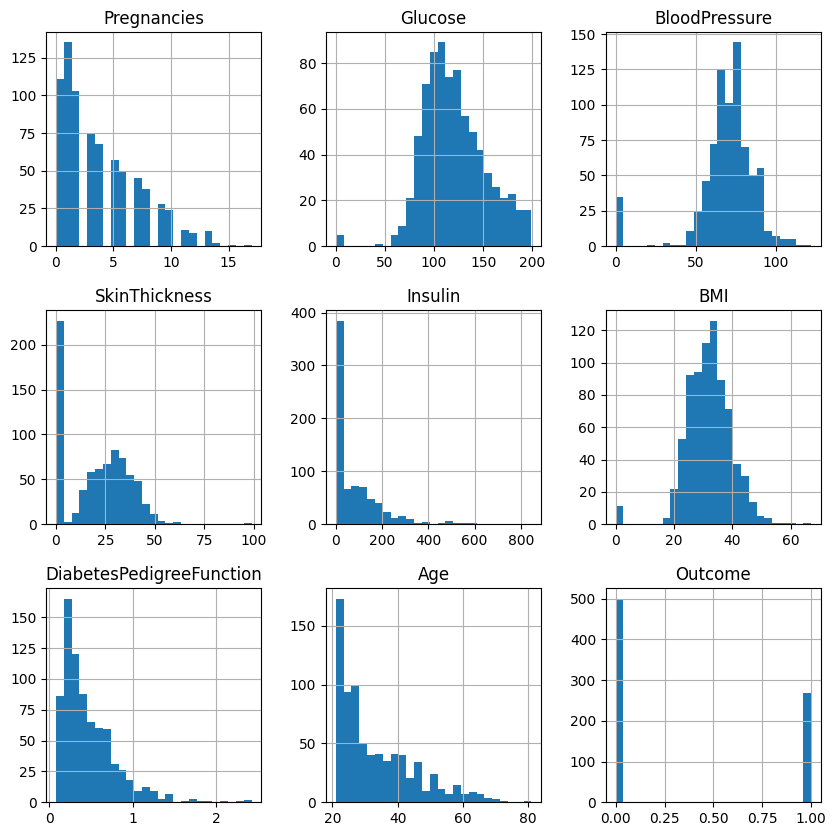

In [13]:
# lets check the distribution of values in each column 
diabetese_dataset.hist(bins = 25, figsize=(10,10))

As we can see the data is not properly distributed hence we have to standard dize our data going further

Now lets see realtions of respective columns with the outcome

<AxesSubplot: xlabel='Outcome', ylabel='Pregnancies'>

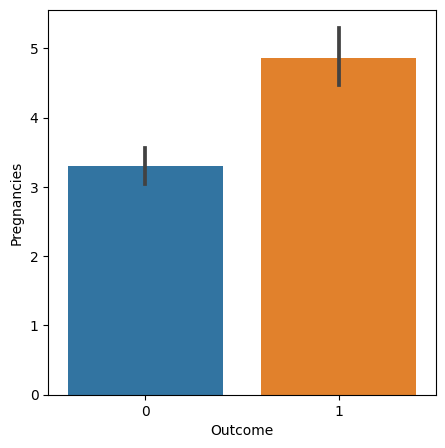

In [14]:
# Pregnancies vs Outcome
plot = plt.figure(figsize=(5,5))
sb.barplot(x = 'Outcome', y = "Pregnancies", data = diabetese_dataset)

From the above we can say if pregnancies is high then there is high possibility that you have diabeties

<AxesSubplot: xlabel='Outcome', ylabel='Glucose'>

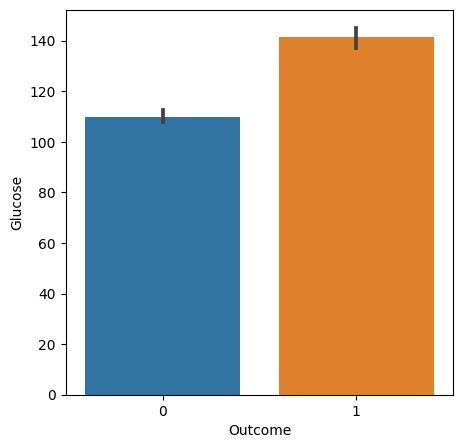

In [15]:
# Glucose vs Outcome
plot = plt.figure(figsize=(5,5))
sb.barplot(x = 'Outcome', y = "Glucose", data = diabetese_dataset)

From the above we can say if glucose level is high then there is high possibility that you have diabeties

<AxesSubplot: xlabel='Outcome', ylabel='BloodPressure'>

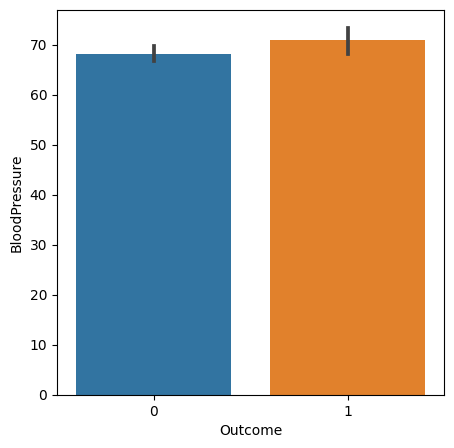

In [16]:
# BloodPressure vs Outcome
plot = plt.figure(figsize=(5,5))
sb.barplot(x = 'Outcome', y = "BloodPressure", data = diabetese_dataset)

From the above we can say there is no much diffrence when it comes to blood pressure

<AxesSubplot: xlabel='Outcome', ylabel='SkinThickness'>

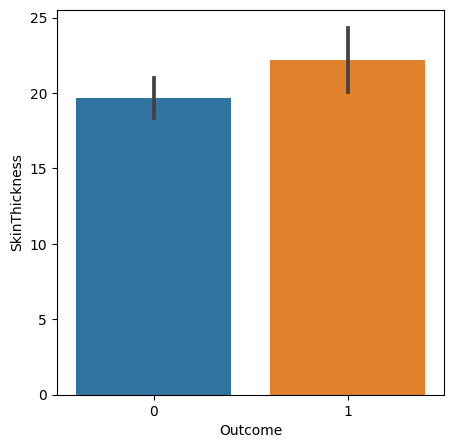

In [17]:
# SkinThickness vs Outcome
plot = plt.figure(figsize=(5,5))
sb.barplot(x = 'Outcome', y = "SkinThickness", data = diabetese_dataset)

Can't determine the relationship here properly

<AxesSubplot: xlabel='Outcome', ylabel='Insulin'>

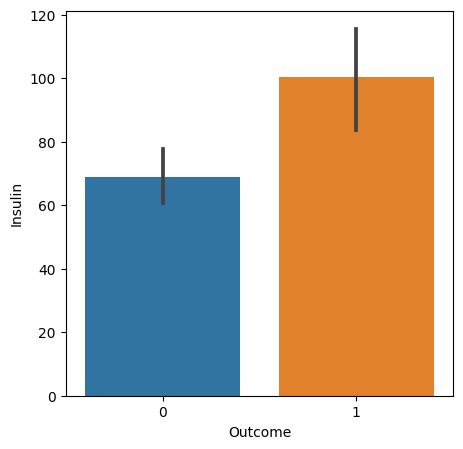

In [18]:
# Insulin vs Outcome
plot = plt.figure(figsize=(5,5))
sb.barplot(x = 'Outcome', y = "Insulin", data = diabetese_dataset)

High insuline means you are diabetic

<AxesSubplot: xlabel='Outcome', ylabel='BMI'>

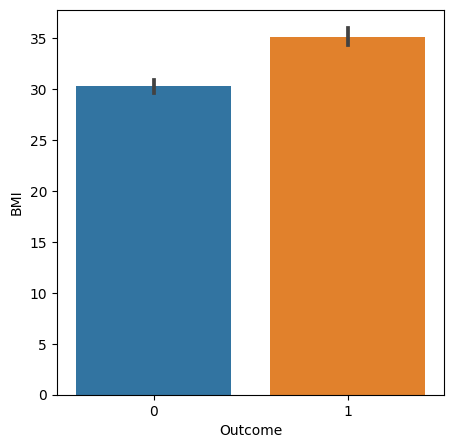

In [19]:
# BMI vs Outcome
plot = plt.figure(figsize=(5,5))
sb.barplot(x = 'Outcome', y = "BMI", data = diabetese_dataset)

High BMI indicates you might be diabetic

<AxesSubplot: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

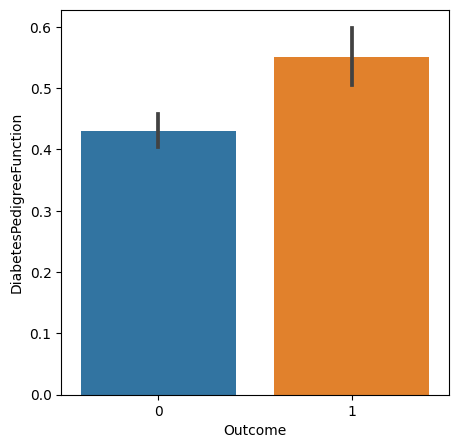

In [20]:
# DiabetesPedigreeFunction vs Outcome
plot = plt.figure(figsize=(5,5))
sb.barplot(x = 'Outcome', y = "DiabetesPedigreeFunction", data = diabetese_dataset)

high DiabetesPedigreeFunction high chances of being diabetic

<AxesSubplot: xlabel='Outcome', ylabel='Age'>

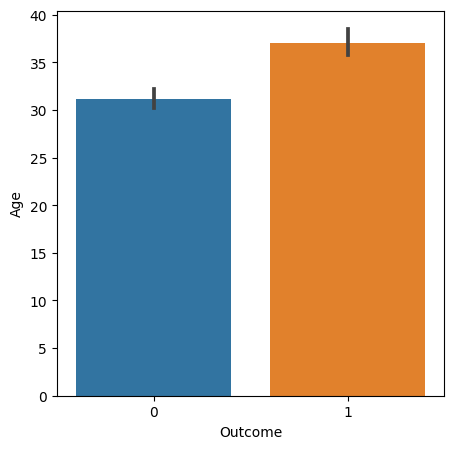

In [21]:
# Age vs Outcome
plot = plt.figure(figsize=(5,5))
sb.barplot(x = 'Outcome', y = "Age", data = diabetese_dataset)

More the age more chances of having diabetese

There is surely some relation between rest of the columns and outcome so we have to check correlations between them

### Correlation
Correlation is a statistical measure (expressed as a number) that describes the size and direction of a relationship between two or more variables. 
there are 2 types of coorelation 
1. Positive correlation
2. Negetive correlation

<AxesSubplot: >

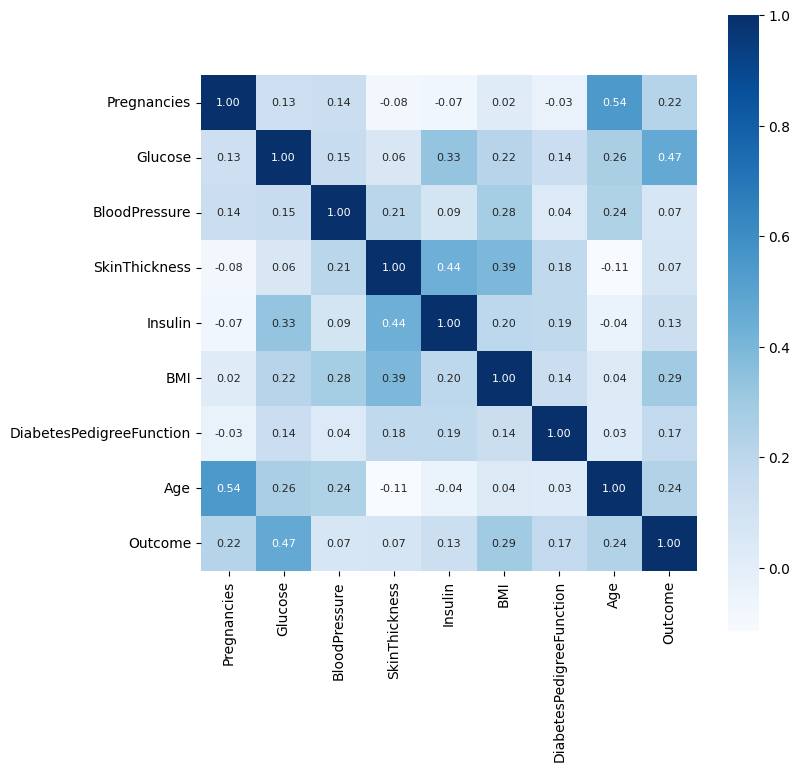

In [22]:
correlation = diabetese_dataset.corr()
plt.figure(figsize=(8,8))
sb.heatmap(correlation, cbar=True, square=True, fmt = '.2f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

### Seprating Data and label
Y(Label): Value to be predicted ie Outcome

X(Data): Data used to predict Y

In [23]:
X = diabetese_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetese_dataset['Outcome']

In [24]:
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


In [32]:
diabetese_dataset.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
27,1,97,66,15,140,23.2,0.487,22,0
456,1,135,54,0,0,26.7,0.687,62,0
540,8,100,74,40,215,39.4,0.661,43,1
558,11,103,68,40,0,46.2,0.126,42,0
589,0,73,0,0,0,21.1,0.342,25,0


### Data Standardization

In [25]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [26]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [27]:
X = standardized_data
Y = diabetese_dataset['Outcome']

### Train Test Spilt

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


## Training the Model- SVM

In [33]:
classifier = svm.SVC(kernel='linear')

In [34]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

### Model evaluation - SVM

Accuracy Score

In [35]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [36]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


## Training the Model - Decision Tree


In [37]:
classifier1 = DecisionTreeClassifier()
# training Decision tree
classifier1.fit(X_train, Y_train)

DecisionTreeClassifier()

### Model evaluation - Decision tree

In [38]:
# accuracy score on the training data
X_train_prediction = classifier1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [39]:
# accuracy score on the test data
X_test_prediction = classifier1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7012987012987013


## Training the Model - RandomForest

In [40]:
classifier2 = RandomForestClassifier()
# training RandomForest
classifier2.fit(X_train, Y_train)

RandomForestClassifier()

### Model evaluation - Random Forest

In [41]:
# accuracy score on the training data
X_train_prediction = classifier2.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [42]:
# accuracy score on the test data
X_test_prediction = classifier2.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7467532467532467


## Training the Model - Neural Network

In [43]:
classifier3 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(6, 3), random_state=1,max_iter = 10000)
# training Neural networks
classifier3.fit(X_train, Y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6, 3), max_iter=10000,
              random_state=1, solver='lbfgs')

### Model evaluation - Neural network

In [44]:
# accuracy score on the training data
X_train_prediction = classifier3.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8289902280130294


In [77]:
# accuracy score on the test data
X_test_prediction = classifier3.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7532467532467533


## Conclusion
After Seeing all the Models which we trained we can Say best performence so far is from SVM 

Hence for developing the system we will be using SVM


## Creating Pickle file for the Model

In [ ]:
import pickle
pickle.dump(classifier,open("DiabeteseModel.pkl","wb"))